# Chapter 14 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbin

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

 Load required packages

In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Example: Housing prices

 Load the data

In [3]:
housing = pd.read_csv("boston-housing.csv")
housing.head()

,CRIM,RM,MEDV
0,0.40771,6.164,21.7
1,0.06263,6.593,22.4
2,0.55778,6.335,18.1
3,0.32982,5.822,18.4
4,0.11027,6.456,22.2


 Plot the data

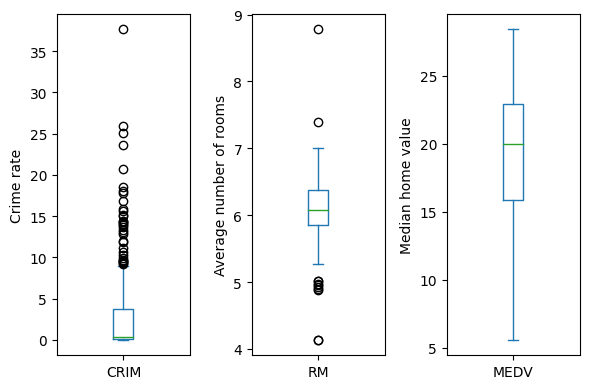

In [4]:
fig, axes = plt.subplots(ncols=3, figsize=(6, 4))
housing["CRIM"].plot.box(ax=axes[0])
axes[0].set_ylabel("Crime rate")
housing["RM"].plot.box(ax=axes[1])
axes[1].set_ylabel("Average number of rooms")
housing["MEDV"].plot.box(ax=axes[2])
axes[2].set_ylabel("Median home value")
plt.tight_layout()
plt.show()

 Calculate correlation matrix

In [5]:
housing.corr()

,CRIM,RM,MEDV
CRIM,1.000000,-0.116051,-0.600458
RM,-0.116051,1.000000,0.365906
MEDV,-0.600458,0.365906,1.000000


## Multiple linear regression using statsmodels

In [6]:
import statsmodels.formula.api as smf
model = smf.ols("MEDV ~ CRIM + RM", data=housing).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.445    
Dependent Variable: MEDV             AIC:                1431.9896
Date:               2023-07-10 13:08 BIC:                1442.7514
No. Observations:   267              Log-Likelihood:     -712.99  
Df Model:           2                F-statistic:        107.8    
Df Residuals:       264              Prob (F-statistic): 6.03e-35 
R-squared:          0.449            Scale:              12.357   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      2.5088    2.8215    0.8892  0.3747  -3.0467   8.0643
CRIM          -0.4904    0.0399  -12.3025  0.0000  -0.5689  -0.4119
RM             3.0083    0.4606    6.5311  0.0000   2.1013   3.9152
------------------------------------------------------------------
Omnibus

## Multiple linear regression using interaction terms

In [7]:
model_i = smf.ols("MEDV ~ CRIM * RM", data=housing).fit()
print(model_i.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.485    
Dependent Variable: MEDV             AIC:                1413.2655
Date:               2023-07-10 13:08 BIC:                1427.6145
No. Observations:   267              Log-Likelihood:     -702.63  
Df Model:           3                F-statistic:        84.43    
Df Residuals:       263              Prob (F-statistic): 2.74e-38 
R-squared:          0.491            Scale:              11.477   
-------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
-------------------------------------------------------------------
Intercept     -7.6236    3.4973  -2.1799  0.0302  -14.5098  -0.7374
CRIM           1.2469    0.3790   3.2898  0.0011    0.5006   1.9932
RM             4.6799    0.5733   8.1627  0.0000    3.5510   5.8089
CRIM:RM       -0.2916    0.0633  -4.6073  0.0000   -0.4162  -0.1670
------

# Assumptions

 Random distribution

/Users/petergedeck/opt/miniconda3/envs/mlba-r/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


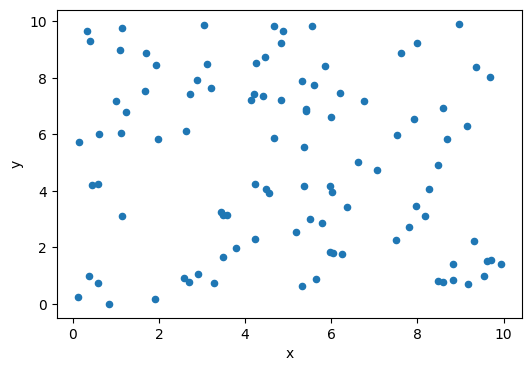

In [8]:
data = pd.DataFrame({
    "x": [random.uniform(0, 10) for i in range(100)],
    "y": [random.uniform(0, 10) for i in range(100)],
})
fig, ax = plt.subplots(figsize=(6, 4))
data.plot.scatter(x="x", y="y", ax=ax)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

 Visualize predicted vs. residual for model without interaction term

/Users/petergedeck/opt/miniconda3/envs/mlba-r/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


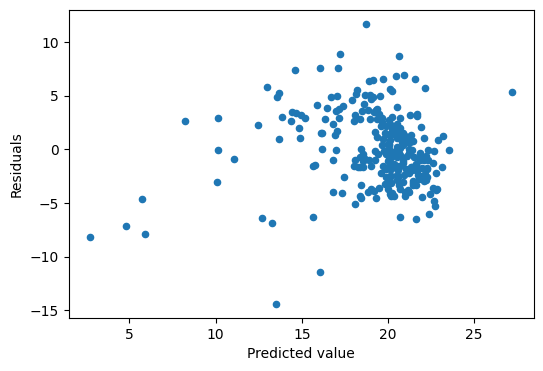

In [9]:
housing["predicted"] = model.predict(housing)
housing["residual"] =  housing["predicted"] - housing["MEDV"]

fig, ax = plt.subplots(figsize=(6, 4))
housing.plot.scatter(x="predicted", y="residual", ax=ax)
ax.set_xlabel("Predicted value")
ax.set_ylabel("Residuals")
plt.show()

 QQ-plot for residuals

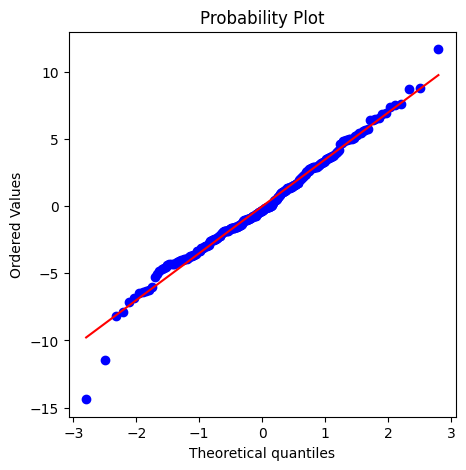

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
stats.probplot(housing["residual"], plot=ax)
plt.show()